In [194]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [209]:
def load_data(filepath):

    with open(filepath, encoding="UTF8") as csvfile:
        pokemon = csv.DictReader(csvfile)

        output = []
        for data in pokemon:
            output.append(data)

        # pop #,Name,Type 1,Type 2,Total
        popData = ['#', 'Name', 'Type 1', 'Type 2',
                   'Total', 'Generation', 'Legendary']
        for data in output:
            for key in popData:
                data.pop(key)

    return output

# input: dict representing one Pokemon
# output: numpy array of shape (6,) and  dtype int64. The first element is x1 and so
# on with the sixth element being x6.


def calc_features(row):
    output = np.array(np.zeros(6), dtype=np.int64)
    output[0] = int(row['Attack'])
    output[1] = int(row['Sp. Atk'])
    output[2] = int(row['Speed'])
    output[3] = int(row['Defense'])
    output[4] = int(row['Sp. Def'])
    output[5] = int(row['HP'])

    return output

    # Z[i, 0] and Z[i, 1] represent the indices of the two cluster
    # Z[i, 2] represents complete linkage distance between Z[i, 0] and Z[i, 1]
    # Z[i, 3] tells the size of the new cluster


def hac(features):
    featureLength = len(features)
    print('featureLength %d' % featureLength)
    # Create an (n − 1) × 4 array or list.
    arr = np.zeros(shape=(featureLength - 1, 4))

    # id : size, combined cluster features list
    clusterInfo = {}

    # Z[i, 0] and Z[i, 1] represent the indices of the two cluster
    # Z[i, 2] represents complete linkage distance between Z[i, 0] and Z[i, 1]
    # Z[i, 3] tells the size of the new cluster
    # distance matrix for each point
    dist = np.full([featureLength * 2, featureLength * 2], -1)
    for i in range(0, featureLength):
        # set ID to every single point
        clusterInfo.update({i: [1, [i]]})
        for j in range(i + 1, featureLength):
            x = np.array([features[i], features[j]])
            # Use numpy.linalg.norm()
            dist[i][j] = dist[j][i] = np.linalg.norm(x)
            
    print('clusterInfo')
    print(clusterInfo)

    # Iterate through this array/list row by row.
    # arrIndex = 0
    check = 0
    index = featureLength  # This index will update the new cluster.

    for row in arr:
        if clusterInfo.items == 1:
            break

        print('=' * 20)
        print("check %d" % (check))
        check += 1
        print("dist")
        print(dist)

        # Determine which two clusters you should merge and put their numbers into the
        # first and second elements of the row, Z[i, 0] and Z[i, 1] and Z[i, 0] < Z[i, 1].
        min = -1
        for i in range(0, featureLength * 2):
            for j in range(i + 1, featureLength * 2):
                # This ith jth cluster is used
                if dist[i][j] == -99:
                    continue
                if dist[i][j] != -1:
                    # This cluster has a distance
                    if min == -1:
                        min = dist[i][j]
                        feature1 = i
                        feature2 = j
                    elif min > dist[i][j]:
                        min = dist[i][j]
                        feature1 = i
                        feature2 = j

        print("feature1 = %d, feature = %d" % (feature1, feature2))

        row[0] = feature1
        row[1] = feature2
        row[2] = min
        row[3] = clusterInfo[feature1][0] + clusterInfo[feature2][0]

        print('row')
        print(row)

        # Determine the distance between the new cluster and the existing cluster
        # for i in range(0, featureLength * 2):
        #     for j in range(i + 1, featureLength * 2):
        #         # This ith cluster is used
        #         if dist[i][j] == -2:
        #             break
        #         # The complete linkage distance is min(max(i, j)),
        #         # and we will find the minimum value from above, so
        #         # just find the maximum distance between two clusters.
        #         for firstItem in clusterInfo[i][1]:
        #             for secondItem in clusterInfo[j][1]:
        #                 if dist[i][j] != -2:
        #                     v = abs(firstItem - secondItem)
        #                     if v > dist[i][j]:
        #                         dist[i][j] = dist[j][i] = v

        # Update the distance matrix that used.
        for i in range(0, featureLength * 2):
            dist[feature1][i] = -99
            dist[feature2][i] = -99
        for i in dist:
            i[feature1] = -99
            i[feature2] = -99

        # set ID to the new cluster
        infos = []
        for i in clusterInfo[feature1][1]:
            infos.append(i)
        for i in clusterInfo[feature2][1]:
            infos.append(i)

        # Delete the cluster which is used
        clusterInfo.pop(feature1)
        clusterInfo.pop(feature2)

        clusterInfo.update({index: [row[3], infos]})

        # Update the distance between the new cluster and the existing cluster
        for i in range(0, featureLength * 2):
            if i in clusterInfo.keys():
                # Access every nodes in the cluster
                for firstItem in clusterInfo[i][1]:
                    for secondItem in clusterInfo[index][1]:
                        x = np.array([firstItem, secondItem])
                        # Use numpy.linalg.norm()
                        v = np.linalg.norm(x)

                        if v > dist[i][index]:
                            dist[i][index] = dist[index][i] = v

        # Update the cluster ID
        index += 1
        print("index %d" % index)
        print('clusterInfo')
        print(clusterInfo)

    return arr


def imshow_hac(Z):
    dn = dendrogram(Z)
    plt.show()


In [196]:
# load_data check
pokemon_list = load_data("Pokemon.csv")
# display(pokemon_list)

In [197]:
# calc_features check
np_pokemon_list = []
np_pokemon_list.append(calc_features(pokemon_list[0]))
np_pokemon_list.append(calc_features(pokemon_list[1]))
np_pokemon_list.append(calc_features(pokemon_list[2]))
np_pokemon_list.append(calc_features(pokemon_list[3]))
np_pokemon_list.append(calc_features(pokemon_list[4]))
np_pokemon_list.append(calc_features(pokemon_list[5]))
# display(np_pokemon_list)


In [210]:
# hac check
hac(np_pokemon_list)

featureLength 6
clusterInfo
{0: [1, [0]], 1: [1, [1]], 2: [1, [2]], 3: [1, [3]], 4: [1, [4]], 5: [1, [5]]}
check 0
dist
[[ -1 212 252 290 183 212  -1  -1  -1  -1  -1  -1]
 [212  -1 272 308 210 235  -1  -1  -1  -1  -1  -1]
 [252 272  -1 337 250 272  -1  -1  -1  -1  -1  -1]
 [290 308 337  -1 289 308  -1  -1  -1  -1  -1  -1]
 [183 210 250 289  -1 210  -1  -1  -1  -1  -1  -1]
 [212 235 272 308 210  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]]
feature1 = 0, feature = 4
row
[  0.   4. 183.   2.]
index 7
clusterInfo
{1: [1, [1]], 2: [1, [2]], 3: [1, [3]], 5: [1, [5]], 6: [2.0, [0, 4]]}
check 1
dist
[[-99 -99 -99 -99 -99 -99 -99 -99 -99 -99 -99 -99]
 [-99  -1 272 308 -99 235   4  -1  -1  -1  -1  -1]
 [-99 272

KeyError: 7

In [ ]:
# Final check
hac([calc_features(row) for row in load_data('Pokemon.csv')][:6])

array([[  0.,   4., 183.,   2.],
       [  0.,   4., 183.,   2.],
       [  0.,   4., 183.,   2.],
       [  0.,   4., 183.,   2.],
       [  0.,   4., 183.,   2.]])

In [ ]:
linkage([calc_features(row) for row in load_data('Pokemon.csv')][:6], method='complete')

array([[  1.        ,   5.        ,  25.65151068,   2.        ],
       [  0.        ,   4.        ,  27.03701167,   2.        ],
       [  6.        ,   7.        ,  47.60252094,   4.        ],
       [  2.        ,   3.        ,  52.9905652 ,   2.        ],
       [  8.        ,   9.        , 139.11865439,   6.        ]])

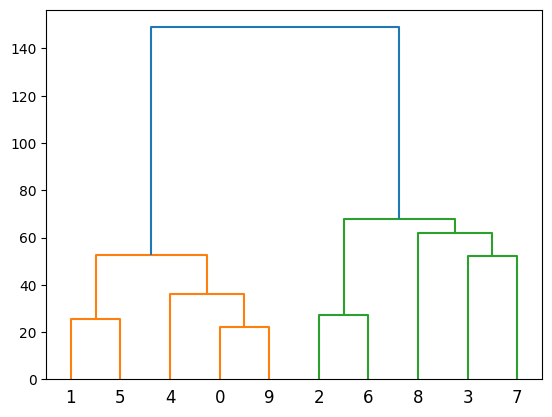

In [ ]:
# Check plot
imshow_hac(linkage([calc_features(row) for row in load_data('Pokemon.csv')][:10], method='complete'))

In [162]:

# Check plot
imshow_hac(hac([calc_features(row) for row in load_data('Pokemon.csv')][:10]))

check 0
feature1 = 4, feature = 9
index 11
check 1
feature1 = 0, feature = 1
index 12
check 2
feature1 = 6, feature = 10
index 13
check 3
feature1 = 2, feature = 11
index 14
check 4
feature1 = 7, feature = 12
index 15
check 5
feature1 = 3, feature = 13
index 16
check 6
feature1 = 5, feature = 14
index 17
check 7
feature1 = 8, feature = 15
index 18
check 8
feature1 = 8, feature = 15


KeyError: 8